In [71]:
import pandas as pd
import os
from scipy import stats
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
import math

In [72]:
path = os.path.join("./", "clean_amazon_movies.csv")
path

'./clean_amazon_movies.csv'

In [73]:
df_clean = pd.read_csv(path)
df_clean


,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
0,0,John Rambo,Tamil,7.0,1 h 26 min,2008,18+,86.0
1,1,American Pie,English,7.0,1 h 35 min,1999,18+,95.0
2,2,Bombshell,English,6.8,1 h 48 min,2019,18+,108.0
3,3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,160.0
4,4,Hippi,Telugu,5.0,2 h 20 min,2019,18+,140.0
...,...,...,...,...,...,...,...,...
5831,8121,Borat Subsequent Moviefilm,English,6.7,1 h 36 min,2020,18+,96.0
5832,8122,Blackout,English,5.2,1 h 31 min,2014,18+,91.0
5833,8123,Loafer,Hindi,6.5,2 h 3 min,1973,All,123.0
5834,8124,Remember Me,English,7.1,1 h 52 min,2010,13+,112.0


In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5836 non-null   int64  
 1   Movie Name       5836 non-null   object 
 2   Language         5836 non-null   object 
 3   IMDb Rating      5836 non-null   float64
 4   Running Time     5836 non-null   object 
 5   Year of Release  5836 non-null   int64  
 6   Maturity Rating  5836 non-null   object 
 7   Minutes          5822 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 364.9+ KB


In [75]:
#Create a dataframe with maturity rating for all age groups
df_maturity_rating = df_clean[df_clean['Maturity Rating'] == 'All']
df_maturity_rating

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
3,3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,160.0
5,6,Ayyaa,Tamil,5.7,2 h 39 min,2005,All,159.0
8,10,Tum Se Achcha Kaun Hai,Hindi,4.5,2 h 21 min,2002,All,141.0
9,11,Swamy,Kannada,6.0,2 h 34 min,2005,All,154.0
10,12,Ekkees Tareekh Shubh Muhurat,Hindi,5.7,1 h 33 min,2018,All,93.0
...,...,...,...,...,...,...,...,...
5824,8114,Pata Nahi Rabb Kehdeyan Rangan Ch Raazi,Punjabi,6.5,2 h 32 mins,2012,All,152.0
5827,8117,Munna Bhai M.B.B.S.,Hindi,8.1,2 h 29 min,2003,All,149.0
5828,8118,Badla,Bengali,6.6,2 h 29 min,2010,All,149.0
5830,8120,Artist,Malayalam,7.1,1 h 47 min,2013,All,107.0


In [76]:
language_df = df_clean.groupby("Language").count()
language_df

,Unnamed: 0,Movie Name,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
Language,,,,,,,
Bengali,529,529,529,529,529,529,528
English,1307,1307,1307,1307,1307,1307,1305
Gujarati,73,73,73,73,73,73,73
Hindi,1537,1537,1537,1537,1537,1537,1534
Kannada,252,252,252,252,252,252,252
Malayalam,433,433,433,433,433,433,433
Marathi,305,305,305,305,305,305,299
Punjabi,122,122,122,122,122,122,120
Tamil,586,586,586,586,586,586,586


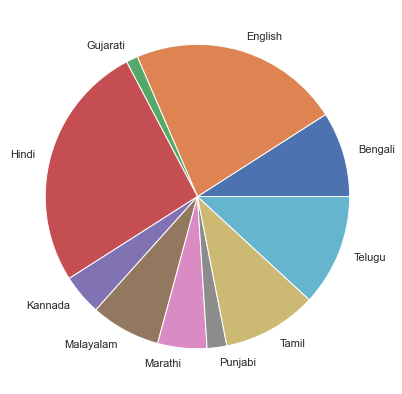

In [77]:
#Pie chart to show the distribution of movies for each language
plt.pie(language_df["Movie Name"], labels= language_df.index)
plt.show()

In [78]:
#Create a dataframe with only movies in English
df_english = df_clean[df_clean["Language"] == "English"]
df_english

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
1,1,American Pie,English,7.0,1 h 35 min,1999,18+,95.0
2,2,Bombshell,English,6.8,1 h 48 min,2019,18+,108.0
11,13,Sealers: One Last Hunt,English,7.7,56min,2020,13+,56.0
12,15,Project Almanac,English,6.4,1 h 46 min,2015,13+,106.0
13,17,Ghost Stories,English,6.4,1 h 33 min,2018,18+,93.0
...,...,...,...,...,...,...,...,...
5820,8107,Annabelle (2014),English,5.4,1 h 38 min,2014,18+,98.0
5825,8115,Secretary (2002),English,7.0,1 h 51 min,2002,18+,111.0
5831,8121,Borat Subsequent Moviefilm,English,6.7,1 h 36 min,2020,18+,96.0
5832,8122,Blackout,English,5.2,1 h 31 min,2014,18+,91.0


In [79]:
#Average rating for movies in English
avg_english_rating = df_english["IMDb Rating"].mean()
avg_english_rating

6.348508033664883

In [80]:
#Create a dataframe with only movies in Bengali
df_bengali = df_clean[df_clean["Language"] == "Bengali"]
df_bengali

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
36,49,Teen Cup Chaa,Bengali,5.7,47min,2018,13+,47.0
40,56,Dash Mash Dash Diner Galpo,Bengali,5.7,1 h 54 min,2019,All,114.0
53,79,Noor Jahan,Bengali,5.3,2 h 22 min,2018,13+,142.0
69,99,Baba Taraknath,Bengali,5.5,2 h 30 min,1977,All,150.0
70,100,Rajlakshmi O Srikanta,Bengali,6.2,2 h 12 min,2017,13+,132.0
...,...,...,...,...,...,...,...,...
5754,8013,Chorabali,Bengali,5.9,1 h 45 min,2016,13+,105.0
5800,8078,Guru Dakshina,Bengali,7.2,2 h 26 min,1987,All,146.0
5819,8106,Indrani,Bengali,7.3,2 h 1 min,2017,13+,121.0
5822,8112,Bhanu Goenda Jahar Assistant,Bengali,6.9,1 h 47 min,2017,13+,107.0


In [81]:
#Average rating for movies in Bengali
avg_bengali_rating = df_bengali["IMDb Rating"].mean()
avg_bengali_rating

6.50680529300567

In [82]:
#Create a dataframe with only movies in Telugu
df_telugu = df_clean[df_clean["Language"] == "Telugu"]
df_telugu

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
4,4,Hippi,Telugu,5.0,2 h 20 min,2019,18+,140.0
24,33,Sketch,Telugu,5.7,2 h 13 min,2018,13+,133.0
71,101,Surya IPS,Telugu,6.9,2 h 23 min,1991,NR,143.0
77,109,Universal Soldier: Day of Reckoning,Telugu,5.0,1 h 45 min,2012,18+,105.0
80,113,Dare,Telugu,5.8,2 h 25 min,2011,NR,145.0
...,...,...,...,...,...,...,...,...
5785,8056,Sundarangudu,Telugu,6.9,1 h 59 min,2004,All,119.0
5790,8063,Bhadra,Telugu,6.7,2 h 33 min,2005,18+,153.0
5792,8066,Adrift,Telugu,6.6,1 h 32 min,2018,16+,92.0
5803,8085,Special,Telugu,6.3,2h,2019,13+,120.0


In [83]:
#Average rating for movies in Telugu
avg_telugu_rating = df_telugu["IMDb Rating"].mean()
avg_telugu_rating

6.256069364161849

In [84]:
#Create a dataframe with only movies in Hindi
df_hindi = df_clean[df_clean["Language"] == "Hindi"]
df_hindi

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
8,10,Tum Se Achcha Kaun Hai,Hindi,4.5,2 h 21 min,2002,All,141.0
10,12,Ekkees Tareekh Shubh Muhurat,Hindi,5.7,1 h 33 min,2018,All,93.0
14,19,Jaani Dushman: Ek Anokhi Kahani,Hindi,2.8,2 h 32 min,2002,13+,152.0
20,27,Uss Din,Hindi,7.4,11min,2010,18+,11.0
22,31,Kanhaiya Ek Yodha (Hindi),Hindi,4.7,1 h 56 min,2019,13+,116.0
...,...,...,...,...,...,...,...,...
5826,8116,Veer Zaara,Hindi,7.8,3 h 12 min,2004,7+,192.0
5827,8117,Munna Bhai M.B.B.S.,Hindi,8.1,2 h 29 min,2003,All,149.0
5829,8119,Aranyaka,Hindi,6.7,1 h 23 min,1994,NR,83.0
5833,8123,Loafer,Hindi,6.5,2 h 3 min,1973,All,123.0


In [85]:
#Average rating for movies in Hindi
avg_hindi_rating = df_hindi["IMDb Rating"].mean()
avg_hindi_rating

5.954716981132074

In [86]:
#Create a dataframe with only movies in Tamil
df_tamil = df_clean[df_clean["Language"] == "Tamil"]
df_tamil

,Unnamed: 0,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Minutes
0,0,John Rambo,Tamil,7.0,1 h 26 min,2008,18+,86.0
3,3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,160.0
5,6,Ayyaa,Tamil,5.7,2 h 39 min,2005,All,159.0
17,24,300: Rise of an Empire,Tamil,6.2,1 h 42 min,2014,18+,102.0
32,44,Law Abiding Citizen,Tamil,7.4,1 h 44 min,2009,18+,104.0
...,...,...,...,...,...,...,...,...
5778,8048,"Alexander (Tamil Language, English Subtitled)",Tamil,6.1,2 h 5 min,1996,13+,125.0
5786,8058,The Room,Tamil,6.0,1 h 39 min,2019,18+,99.0
5789,8061,Vallarasu,Tamil,6.2,2 h 47 min,2000,All,167.0
5798,8074,Bale Pandiya,Tamil,7.8,2 h 31 min,1962,NR,151.0


In [87]:
#Average rating for movies in Tamil
avg_tamil_rating = df_tamil["IMDb Rating"].mean()
avg_tamil_rating

6.219624573378844

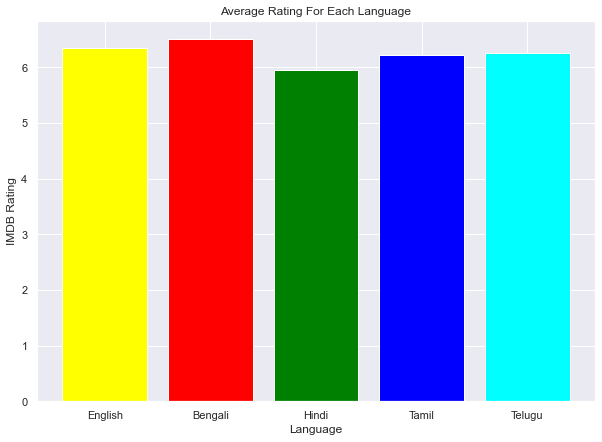

In [88]:
#Bar Chart showing IMDB Rating for movies in each language
avg_rating = [avg_english_rating, avg_bengali_rating, avg_hindi_rating, avg_tamil_rating, avg_telugu_rating]
avg_language = ["English", "Bengali", "Hindi", "Tamil", "Telugu"]

plt.bar(avg_language, avg_rating, color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Language")
plt.ylabel("IMDB Rating")
plt.title("Average Rating For Each Language")

plt.show()

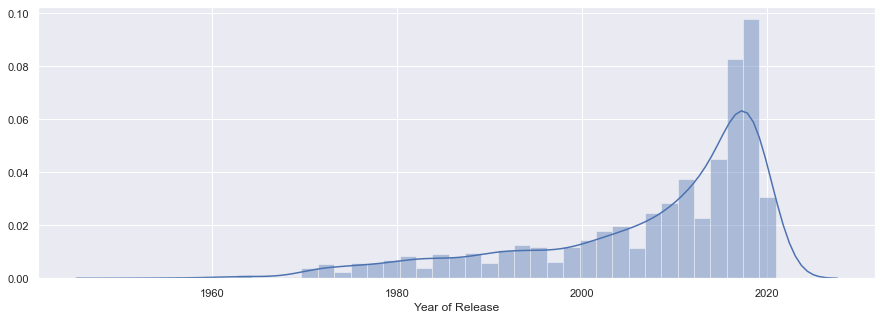

In [89]:
#Distribution chart shows that there are more Amazon Prime movies made in recent years as opposed to early years
plt.figure(figsize = (15,5))
ax = sns.distplot(df_clean['Year of Release'])

<AxesSubplot:xlabel='Minutes', ylabel='IMDb Rating'>

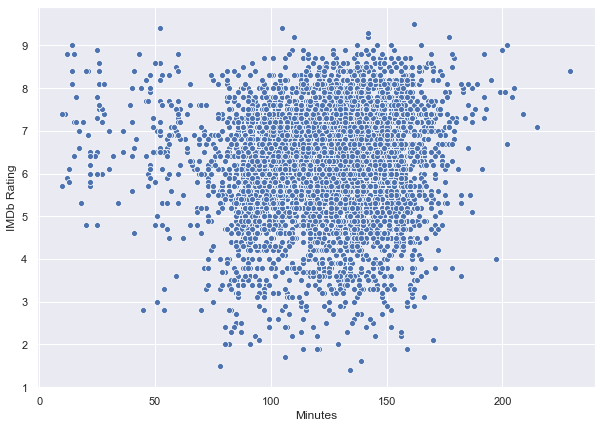

In [90]:
sns.scatterplot(x="Minutes", y="IMDb Rating", data=df_clean)
# Scatterplot has no linearity. No correlation between movie length and IMDb Rating. Movie length does not affect the whether or not a movies is highly rated.

In [91]:
#Do movies have higher ratings when they are longer, or do they have higher ratings when they are shorter?
#Is there a statistically significant difference in ratings between films longer than 100 minutes and shorter than 100 minutes
#Ho: There is no difference in ratings for films longer and shorter than 100 minutes
#Ha: There is a statistical difference in rating between longer and shorter films.

long_films = df_clean.iloc[(df_clean['Minutes'] <= 100).values]
short_films = df_clean.iloc[(df_clean['Minutes'] > 100).values]

stats.ttest_ind(long_films['IMDb Rating'], short_films['IMDb Rating'])

Ttest_indResult(statistic=-10.073685450318974, pvalue=1.127981205095576e-23)

In [92]:
#P-value < alpha at 0.05. Significant evidence to reject Ho.
#There is a difference in film ratings between longer and shorter films
#Which has the higher ratings?
df_long_film = df_clean[df_clean["Minutes"] >= 100]
df_long_film
avg_long_film = df_long_film["IMDb Rating"].mean()
avg_long_film

6.3305203323130765

In [93]:
df_short_film = df_clean[df_clean["Minutes"] < 100]
df_short_film
avg_short_film = df_short_film["IMDb Rating"].mean()
avg_short_film
#Movies that are 100 minutes or longer has statistically higher ratings than movies less than 100 minutes

5.913141025641027

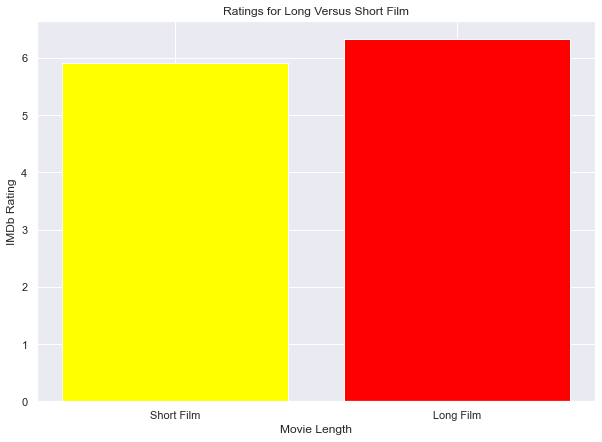

In [94]:
x_axis = ["Short Film", "Long Film"]
y_axis = [avg_short_film, avg_long_film ]
plt.bar(x_axis, y_axis, color=['yellow', 'red'])
plt.xlabel("Movie Length")
plt.ylabel("IMDb Rating")
plt.title("Ratings for Long Versus Short Film")

plt.show()

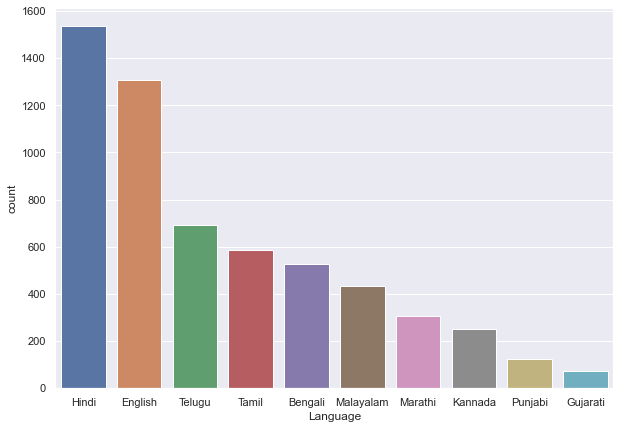

In [95]:
sns.set(style="darkgrid", rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="Language", data=df_clean, order=df_clean['Language'].value_counts().index[0:10])
#count of different languages

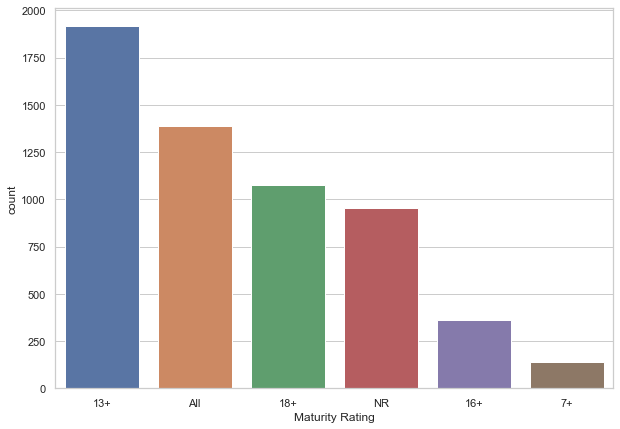

In [97]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Maturity Rating", data=df_clean, order=df_clean['Maturity Rating'].value_counts().index[0:10])
#Count of different maturity ratings

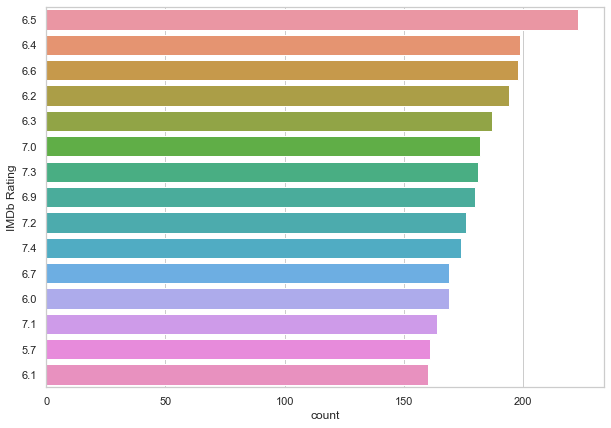

In [98]:
ax = sns.countplot(y="IMDb Rating", data=df_clean, order=df_clean['IMDb Rating'].value_counts().index[0:15])
#count of each IMDb Ratings

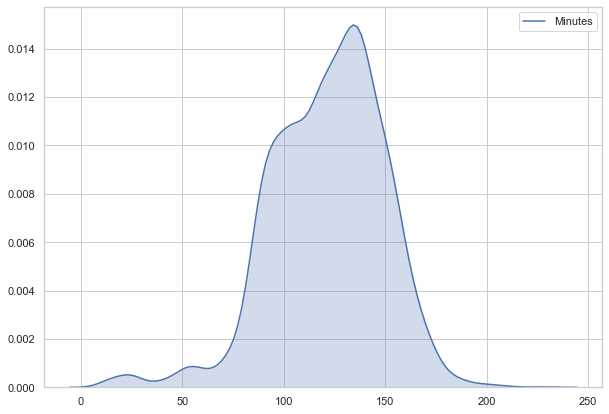

In [100]:
ax = sns.kdeplot(data=df_clean['Minutes'], shade=True)
#average minutes per movie

In [102]:
sns.scatterplot(x="Minutes", y="IMDb Rating", data=df_english)
#Correlation of minutes to IMDb based on movies and shows in English language

SyntaxError: unexpected EOF while parsing (<ipython-input-102-cf90ab7ccb1c>, line 2)